# The Sparks Foundation- Data Science & Business Analytics Internship

###### Author : Kashif Karim

#### Task  1: Prediction Using Supervised Machine Learning

- In this Task we are going to predict the percentage of score of a student based on the number of hours He / She studies.

- **Dataset Variables**

- **Hours** : Represents the number of hours the student studies

- **Score** : Represents the score of student

##### Import The Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Import The Dataset

In [2]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Data Exploration

##### Shape of dataframe

In [3]:
print(df.shape)
df.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


- As we can see the **dataset** contains **Two variables ("Hours","Scores")** and **25 records** (rows). 

##### Checking datatype of variales

In [4]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

- we can see that variable **Hours** is **float64** and variable ***Scores*** is **intiger** type. 

##### Describe Data

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


- As we can see that **describe()** funtion calculated some statistical data outof the provided dataframe.
i.e 
- **Mean**
- **Percentile**
- **Count**
- **min value**
- **max value**
- **standard deviation**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


- The **info()** funtion shows all the information related to the dataset
- It shows the the number of colums its datatypes and non-null values in the each colum of dataset. 

### Visual Plots

#### Regreassion Plot

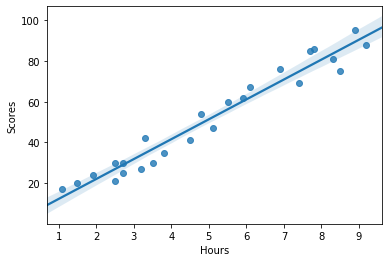

In [7]:
sns.regplot(x='Hours', y='Scores',data=df)

- The **regplot()** illustrates that there is a linear relationship between variables.

#### Pearson Correlation

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


- A correlation coefficient of **0.97** Scince it is positive so, if the number of **Hours** increases the **Scores** would also increase.
- The relation could be classified as **very strong** since it fits in the **0.97 <= 1.00** category.

- ###### As we know the relationship and correlation between the data. Lets see the distribution of variables. 

#### Distribution

In [9]:
hours =  df['Hours']
scores = df['Scores']

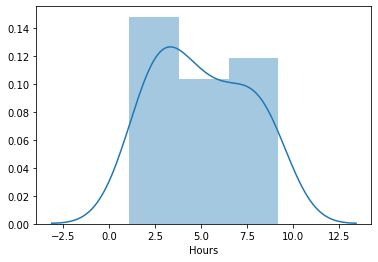

In [10]:
sns.distplot(hours)

- distplot() shows that **Hours** are in the particular range and there is no outliers in the variable.

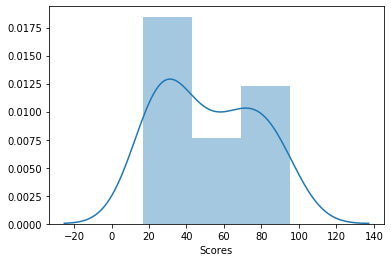

In [11]:
sns.distplot(scores)

- distplot() shows that **Hours** are in the particular range and there is no outliers in the variable.

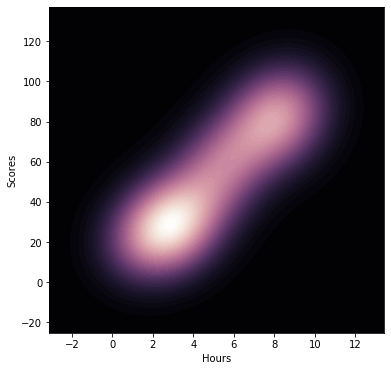

In [12]:
f,ax=plt.subplots(figsize=(6,6))
cmap=sns.cubehelix_palette(as_cmap=True,dark=0,light=1,reverse=True)
sns.kdeplot(hours,scores,cmap=cmap,n_levels=60,shade=True)

# Model Deployment

### Spliting Dependent and Independent Variables

In [13]:
X = df[['Hours']]
Y = df[['Scores']]
print(X.shape)
print(Y.shape)

(25, 1)
(25, 1)


### Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
xtrain ,xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.20, random_state=25,shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(20, 1) (20, 1)
(5, 1) (5, 1)


### Training Model Predicting and Testing

#### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
model.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
pred = model.predict(xtest)

In [18]:
m = model.coef_
m

array([[9.54160399]])

In [19]:
c = model.intercept_
c

array([3.50657905])

<function matplotlib.pyplot.show(*args, **kw)>

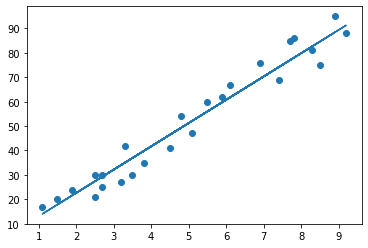

In [20]:
line = m*X+c
plt.scatter(X,Y)
plt.plot(X,line)
plt.show

# Model Evaluation

### **Checking r2 by sklearn metric**

R2 is a statistic that will give some information about the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R2 of 1 indicates that the regression predictions perfectly fit the data.A constant model that always predicts the expected value of y, disregarding the input features, would get a R2 score of 0.0.

In [21]:
from sklearn import metrics
from sklearn.metrics import r2_score
test_r2=r2_score(ytest,pred)

In [22]:
train_r2=r2_score(ytrain,model.predict(xtrain))
MAE = metrics.mean_absolute_error(ytest,pred)

In [23]:
print('R2 score for testing:',test_r2 )
print('R2 score for training:',train_r2 )
print('Mean Absolute Error :', MAE )

R2 score for testing: 0.9434635261365244
R2 score for training: 0.9526743156185514
Mean Absolute Error : 5.277957406381123


- **Since an R2 score for both testing and traing data is** **0.95** **which is closed to 1 which indicates that the regression predictions perfctly fit the data.**

## Question 

## What would be the score if a student studies for 9.25 hours / day ?

#### Answer :

In [24]:
H = 9.25
results = model.predict([[H]])
print("If a student studies for {} hours per day He/She would score {} % in exames.". format(H,results))

If a student studies for 9.25 hours per day He/She would score [[91.76641596]] % in exames.
